# 911 Calls Capstone Project

For this capstone project I briefly analysed a 911 Emergency call dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). I wanted to examine the amount of calls that the county's departments received over periods of time.

This project focuses on utilizing Python's data analysis and visualization libraries to perform data analytics.

**First, I import the necessary libraries and then load the csv file into the dataframe which will be called df.**

In [86]:
import numpy as np
import pandas as pd

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

In [88]:
df = pd.read_csv('911.csv')

 **Taking a look at the data that I'll be working with:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**The dataset contains the following columns:**

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**Doing some basic data exploration:**

 **Top 5 zipcodes for 911 calls:** 

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 townships (twp) for 911 calls:** 

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -             23066
Traffic: DISABLED VEHICLE -              7702
Fire: FIRE ALARM                         5496
EMS: RESPIRATORY EMERGENCY               5112
EMS: CARDIAC EMERGENCY                   5012
EMS: FALL VICTIM                         4863
EMS: VEHICLE ACCIDENT                    3935
Traffic: ROAD OBSTRUCTION -              3144
EMS: SUBJECT IN PAIN                     2687
EMS: HEAD INJURY                         2631
EMS: UNKNOWN MEDICAL EMERGENCY           1873
EMS: SYNCOPAL EPISODE                    1717
Fire: VEHICLE ACCIDENT                   1638
EMS: SEIZURES                            1630
EMS: GENERAL WEAKNESS                    1464
Fire: FIRE INVESTIGATION                 1460
EMS: ABDOMINAL PAINS                     1436
EMS: ALTERED MENTAL STATUS               1386
EMS: MEDICAL ALERT ALARM                 1342
EMS: HEMORRHAGING                        1259
EMS: CVA/STROKE                          1202
EMS: OVERDOSE                     

**There are 110 unique types of reasons that the departments get calls for and it looks like vehicle accidents occur the most in this particular county.**

____

**Creating a new column for just the departments that get these calls so that I can easily plot and analyse them by department type:**

In [100]:
x = df['title'].iloc[0]

In [101]:
x.split(':')[0]

'EMS'

In [98]:
df['department'] = df['title'].apply(lambda x: x.split(':')[0])

In [99]:
df['department']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

**Doing some basic exploratory analysis on the new 'department' column:**

In [8]:
df['department'].value_counts().head(1)

EMS    48877
Name: department, dtype: int64

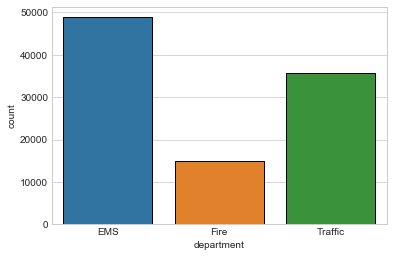

In [9]:
sns.countplot(x='department', data=df)

**It appears that the EMS department gets the most number of calls in this county.** 

**The variable type on timestamp appears to be a string which will not help much when trying to analyse data or create a machine learning model:**

In [34]:
type(df['timeStamp'][0])

str

**Converting df['timeStamp'] column from strings to DateTime objects using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).**

In [89]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslib.Timestamp

**Also gonna create new columns based on this timestamp so that I can analyse the department column by the number of calls each department gets every hour or month or for the week.**

In [90]:
time = df['timeStamp'].iloc[0]
time.dayofweek

df['Hour'] = df['timeStamp'].apply(lambda dt: dt.hour)
df['Month'] = df['timeStamp'].apply(lambda dt: dt.month)
df['Day of Week'] = df['timeStamp'].apply(lambda dt: dt.strftime('%a'))

**This is the frequency of calls that the departments receive hourly:**

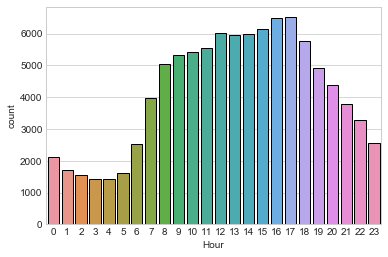

In [44]:
sns.countplot(x='Hour', data = df)

**The frequency of calls increase from early morning till early evening with the highest frequency of calls received from around 4 to 5 PM.**

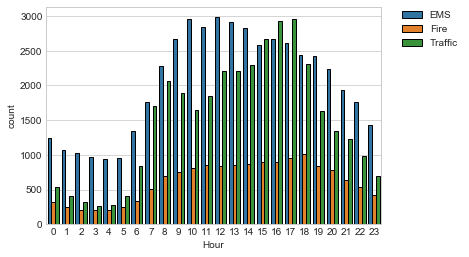

In [83]:
#Comparing frequency of calls received by each department across the hour
sns.countplot(x= 'Hour', data=df, hue='department')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**All departments receive the least number of calls from midnight to 5 in the morning where most people are likely to be asleep and the least number of emergencies are likely to occur. The volume of calls spike naturally from 6AM onwards all the way until 5pm where the volume of calls steadily decrease till the end of the day.**

**The EMS department receives the most calls from 9AM to 2PM. Traffic department also receives a high volume of calls particularly from 4pm to 5pm which makes sense since [traffic accidents occur more frequently](https://coverhound.com/blog/post/what-time-of-day-do-most-accidents-occur) when people are rushing home from work to eat dinner, spend time with their families, etc. The fire department experiences the lowest frequency of calls.**

**Frequency of calls per day:**

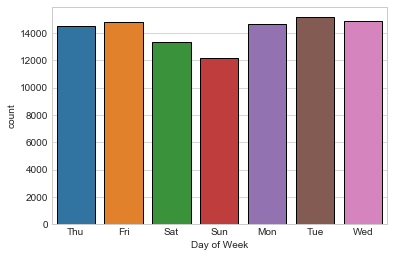

In [51]:
sns.countplot(x='Day of Week', data=df)

**It's interesting to note that the departments get the least number of calls during the weekends.**

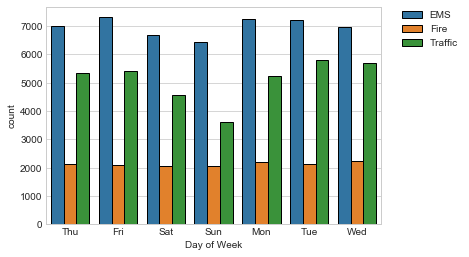

In [40]:
#Comparing frequency of calls recieved by each department per day
#EMT get the most constant amount of calls and the Fire department get the least
#Across the frequency of EMT calls across the week, they get the most calls on the weekdays (why though?)
sns.countplot(x='Day of Week', hue='department', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Frequency of calls by month:

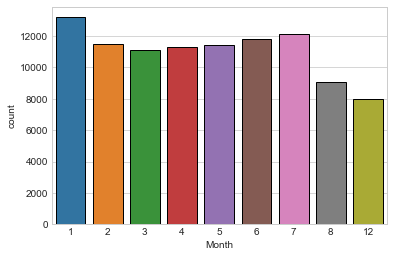

In [52]:
sns.countplot(x='Month', data=df)

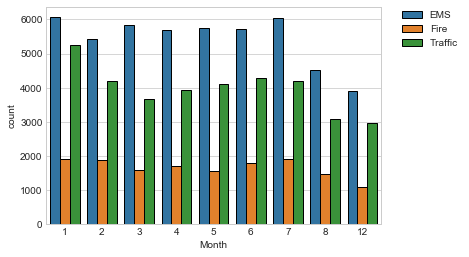

In [41]:
#Comparing frequency of calls recieved by each department monthly
#why do the EMT calls experience a sharp drop during the months of August to December? 
#Also where the hell did three of my months go?
sns.countplot(x='Month', hue='department', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**The EMS department received a high frequency of calls throughout the month but suddenly experienced a dip in calls from July onwards. So did the other departments in fact.**

**Perhaps there was a decrease in frequency from July to August since that's the summer period in America and as I'm analysing an American county, most of the people living there could have been away for summer vacations. But this also doesn't explain why the highest frequency of calls that EMS department received for the year was during the summer in June.**

**Furthermore this plot is also missing some months between the months of August to December.**

**____**

**Although we're missing a few months we could be able to fill in this information by plotting the information another way.**


In [54]:
#by using the groupby method on the Month column we called every instance of the other columns by the month instead of - 
# - the usual numerical index
byMonth  = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


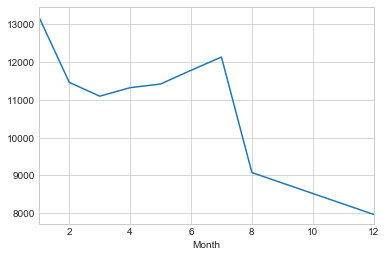

In [84]:
byMonth['lat'].plot()

**Having filled in the missing months, we can still note that there appears to be a negative trend in the number of calls received in the second half of the year, with the number of calls decreasing sharply after June.**

**Creating a linear fit on the calls recieved per month to find out how accurate our above plot is:**

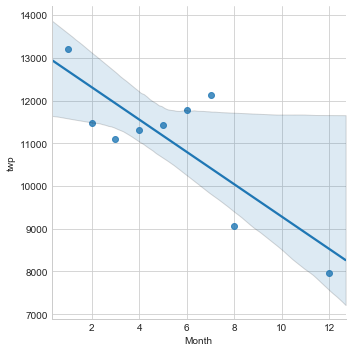

In [82]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**The light blue shaded portion in this linear fit indicates that our byMonth plot earlier on has a large margin error and that the plot isn't precise in its values, which makes sense since we're missing data from the months of September 2016 till December 2016.**

**The scatter points represent the frequency of calls and there is a weird trend that replicates the trend in the previous plot. So perhaps the byMonth method isn't the best way to fill in the missing months because the plot is not very reliable.**

**Trying another way to accurately plot the calls for the year:**

In [91]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [92]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [76]:
print('First date of dataset:', df['Date'].iloc[0])
print('Final date of dataset:', df['Date'].iloc[-1]) 

First date of dataset: 2015-12-10
Final date of dataset: 2016-08-24


**The first recorded date in this dataset is for the 10th of December 2015 and the last recorded date is for the 24th of August 2016 which would explain why my earlier linear fit returned a huge margin error. The dataset information only stops at August. From here on out, if I wanted to find out the calls occurring after August 2016, I would have to create a model that would predict the values.**

**For now I can still analyse 911 calls that occurred during the existing months (from December 2015 - August 2016) by creating a new column for the dates and analysing that column instead:**

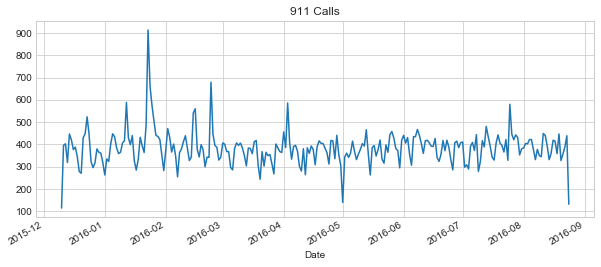

<function matplotlib.pyplot.tight_layout>

In [61]:
date_count = df.groupby('Date')['lat'].count()
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(date_count.index, date_count)
fig.autofmt_xdate()
ax.set_title('911 Calls')
ax.set_xlabel('Date')
plt.show()
plt.tight_layout

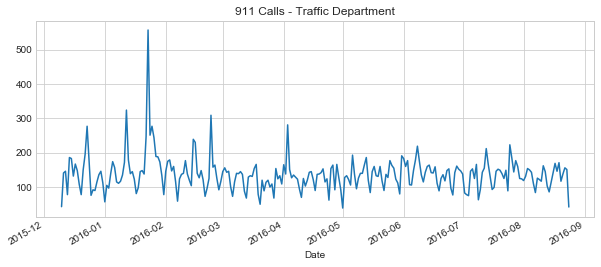

<function matplotlib.pyplot.tight_layout>

In [62]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(date_count.index, df[df['department']=='Traffic'].groupby('Date')['twp'].count())
fig.autofmt_xdate()
ax.set_title('911 Calls - Traffic Department')
ax.set_xlabel('Date')
plt.show()
plt.tight_layout

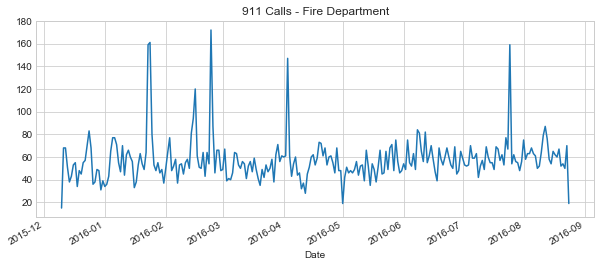

<function matplotlib.pyplot.tight_layout>

In [63]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(date_count.index, df[df['department']=='Fire'].groupby('Date')['twp'].count())
fig.autofmt_xdate()
ax.set_title('911 Calls - Fire Department')
ax.set_xlabel('Date')
plt.show()
plt.tight_layout

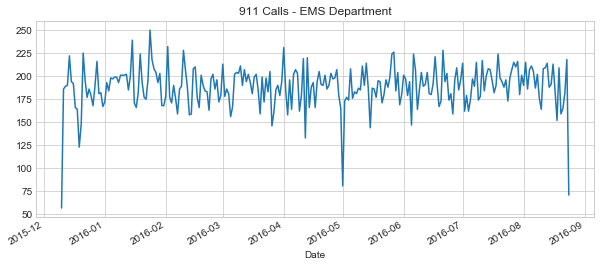

<function matplotlib.pyplot.tight_layout>

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(date_count.index, df[df['department']=='EMS'].groupby('Date')['twp'].count())
fig.autofmt_xdate()
ax.set_title('911 Calls - EMS Department')
ax.set_xlabel('Date')
plt.show()
plt.tight_layout

**Calculating the averages of the calls received by the departments monthly:**

In [114]:
EMS_911 = df[df['department']=='EMS'].groupby('Date')['twp'].count()
Fire_911 = df[df['department']=='Fire'].groupby('Date')['twp'].count()
Traffic_911 = df[df['department']=='Traffic'].groupby('Date')['twp'].count()

In [117]:
print('Average number of calls in total per month: ', date_count.mean())
print('Average number of calls for EMS department per month: ', EMS_911.mean())
print('Average number of calls for Traffic department per month: ', Traffic_911.mean())
print('Average number of calls for Fire department per month: ', Fire_911.mean())

Average number of calls in total per month:  384.13899613899616
Average number of calls for EMS department per month:  188.6216216216216
Average number of calls for Traffic department per month:  137.8108108108108
Average number of calls for Fire department per month:  57.54054054054054


**This method of plotting the number of calls per month shows a better picture of the departments' monthly activity. On average, this county receives about 384 calls per month with the Fire department receiving the lowest number of calls with an average of number of 58. The Traffic department receives about a monthly average of 138 and the EMS department is of course the highest with a monthly average of 189.**

**It's also interesting to note the sharp spikes of activity in each plot and how some of them actually seem to coincide amongst the departments. During February 2016, both the fire and the traffic departments experienced significantly sharp increases in calls around the same time which makes me wonder if something major happened during February.**

**A little googling shows that there were [severe thunderstorms](http://www.nbcphiladelphia.com/weather/stories/Severe-Thunderstorms-Strong-Winds-Flooding-370076291.html) in the area in February 2016 resulting in heavy damages which would have led to a lot of people calling the traffic and fire departments for help. The EMS department also experienced an increase in calls  for February but not as significantly as the other two departments.**

**Future analysis of this dataset could involve analysing the kinds of calls each department responds to and trying to see if there is a correlation with the spikes in the above plots**

____
**Finally I'm going to create heatmaps of our data, analyzing the number of calls received every day of the week by every hour.**

In [85]:
#we are reshaping our dataframe so as to determine: (1) the frequency of calls made to all the departments
#(2) that have been made in every hour (3) of each day
dayHour = df.groupby(by=['Day of Week','Hour']).count()['department'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


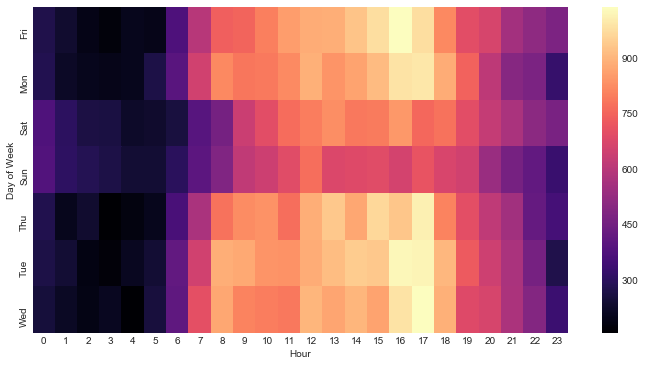

In [116]:
#this heatmap tells us that the least number of calls to departments are made on all days in the early hours of the morning
#the most number of calls are made during the afternoon
#departments recieve the least number of calls during the weekends
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap = 'magma')

**Creating a clustermap: **

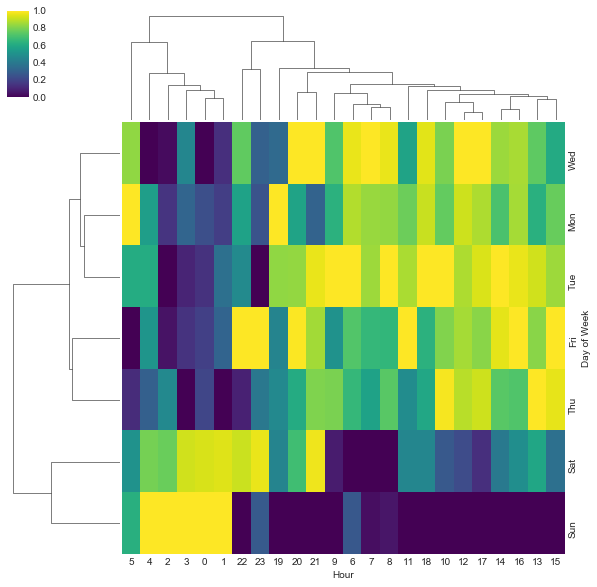

In [111]:
#remember: a clustermap goes one step further than a heatmap and clusters groups with similar data next to each other
sns.clustermap(dayHour, cmap='viridis', standard_scale=1)

**The heatmaps confirm earlier analyses about the least number of 911 calls occurring in the early hours of the morning while the most number of calls are usually made during the afternoon. Again it is interesting that the least number of calls occur during the weekends but I would need to analyse the data even more thoroughly to gain better insights on this.**

____
**In conclusion:**

**There seems to be a normal distribution of calls across the day with the most number of calls being made in the daytime where human activity is the highest and with the least number of calls occurring late nights where human activity is likely to be the lowest.**

**The EMS departments receives the highest volume of calls, followed by the traffic department and finally the fire department. The traffic department experiences the highest volume of calls around the rush hour period in the evenings.**

**It is interesting to see that the departments experienced similar spikes in phone calls following major events like thunderstorms. It is a little unusual that the departments respond to the least number of calls during the weekends because you would figure that human activity would be significantly higher on the weekends than on the weekdays.**
____

**Moving on from here:**

**I could gain better insights about the accidents and crimes and other events (such as the thunderstorm in February 2016) that occur within this country by further analysing the calls by the reasons that each department gets called for and see the most common types of cases that are prevalent in this county.**

**I could also plot the calls over an actual map of the county whereby I can understand which types of calls are common in which areas of the county and which parts of the county experience the highest occurrences of accidents or criminal activity.**